# Exploratory Data Analysis (EDA)
## Overview
This notebook performs Exploratory Data Analysis (EDA) on the customer churn dataset. The goal is to uncover initial insights and patterns in the data that will inform further analysis and modeling.

**Steps**:
- Initial Setup and Data Loading: Import necessary libraries, set plot styles, and load the dataset. This step ensures that the environment is prepared for EDA and that the dataset is correctly loaded for analysis.
- Data Overview: Display information about the DataFrame, including data types, non-null values, and basic statistics for both numeric and categorical features. This provides a comprehensive overview of the dataset's structure and contents.
- Missing Data Analysis: Calculate the total number and percentage of missing values for each column. Understanding the extent of missing data is crucial for data cleaning and preprocessing.
- Visualizing Categorical Data: Create count plots for each categorical column to visualize their distributions. These plots help in understanding the frequency distribution of categorical features and identifying any imbalances.
- Visualizing Numerical Data: Create histograms and box plots for numeric columns to visualize their distributions and identify outliers. These visualizations provide insights into the central tendency, dispersion, and shape of the numeric data.
- Correlation Analysis: Calculate and visualize the correlation matrix for numeric columns using a heatmap. This helps in identifying relationships between different numeric features and understanding how they might influence each other.
- Churn Distribution: Create a count plot to visualize the distribution of the target variable 'Churn'. This provides insights into the proportion of customers who churn versus those who do not.
- Pair Plots: Create pair plots for numeric columns colored by the 'Churn' column to visualize the relationships between different features and how they differ for customers who churn versus those who do not.

By the end of this notebook, we will have a thorough understanding of the dataset's structure, the distribution of its features, and the relationships between them, which will lay the foundation for more detailed analysis and modeling.












## Initial Setup and Data Loading
In this section, we will perform the initial setup, including importing necessary libraries, setting plot styles, and loading the dataset.

**Steps**:
1. Import Libraries: Import the necessary libraries pandas, matplotlib.pyplot, seaborn, json, os, and warnings.
2. Ignore Warnings: Use warnings.filterwarnings("ignore") to ignore warnings.
3. Set Plot Style: Set the plot style using sns.set(style="whitegrid").
4. Helper Function to Find Project Root: Define a helper function find_project_root to find the project root directory by looking for config.json.
5. Find Project Root Directory: Call the find_project_root function to find the project root directory.
6. Load Configuration: Load the configuration from config.json.
7. Load Dataset: Load the dataset using the path specified in the configuration.
8. Display First Few Rows: Display the first few rows of the DataFrame using df.head().







In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import warnings

warnings.filterwarnings("ignore")

# Set plot style
sns.set(style="whitegrid")

# Helper function to find the project root directory
def find_project_root(filename='config.json'):
    current_dir = os.getcwd()
    while True:
        if filename in os.listdir(current_dir):
            return current_dir
        parent_dir = os.path.dirname(current_dir)
        if parent_dir == current_dir:
            raise FileNotFoundError(f"{filename} not found in any parent directories.")
        current_dir = parent_dir

# Find the project root directory
root_dir = find_project_root()

# Load configuration
config_path = os.path.join(root_dir, 'config.json')
with open(config_path, 'r') as f:
    config = json.load(f)

# Load the dataset
dataset_path = os.path.join(root_dir, config['raw_data_path'])
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe
df.head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes


## Data Overview
In this section, we will display an overview of the dataset to understand its structure and basic statistics.

**Steps**:
1. DataFrame Information: Use `df.info()` to display information about the DataFrame, including data types and non-null values.
2. Descriptive Statistics for Numeric Features: Use `df.describe()` to display descriptive statistics for numeric features.
3. Descriptive Statistics for Categorical Features: Use `df.describe(include=['object'])` to display descriptive statistics for categorical features.







In [31]:
# Data summary
df.info()

# Display descriptive statistics
df.describe()

# Display descriptive statistics for categorical features
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


,gender,Dependents,PhoneService,MultipleLines,InternetService,Contract,Churn
count,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,2
top,Male,No,Yes,No,DSL,Month-to-month,No
freq,3555,4933,6361,4072,3947,3875,5174


## Distribution of Churn
In this section, we will create a count plot for the 'Churn' column. This visualization helps in understanding the distribution of customers who churn versus those who do not.

**Steps**:
1. Set Figure Size: Set the size of the figure using plt.figure(figsize=(10, 5)).
2. Create Count Plot: Use sns.countplot to create a count plot for the 'Churn' column.
3. Add Title: Add a title to the plot using plt.title('Distribution of Churn').
4. Save Count Plot: Define the path to save the count plot image and save it using plt.savefig.


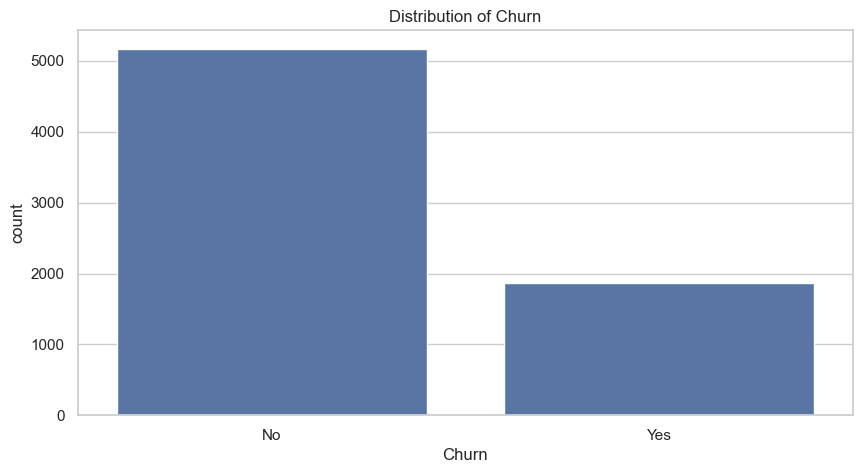

In [32]:
# Set the size of the figure
plt.figure(figsize=(10, 5))

# Create a count plot for the 'Churn' column
sns.countplot(data=df, x='Churn')

# Add a title to the plot
plt.title('Distribution of Churn')

# Define the path to save the count plot image
save_path = os.path.join(root_dir, 'Data_Preparation', 'eda_visualizations', 'churn_distribution.png')

# Save the count plot to the specified path
plt.savefig(save_path)

# Display the count plot
plt.show()


## Histograms for Numerical Distributions
In this section, we will create histograms for all columns in the DataFrame. These visualizations help in understanding the distribution of numerical features.

**Steps**:
1. Create Histograms: Use df.hist(bins=30, figsize=(20, 15)) to create histograms for all columns in the DataFrame with 30 bins and a specified figure size.
2. Save Histograms: Define the path to save the histograms image and save it using plt.savefig.
3. Display Histograms: Display the histograms using plt.show.







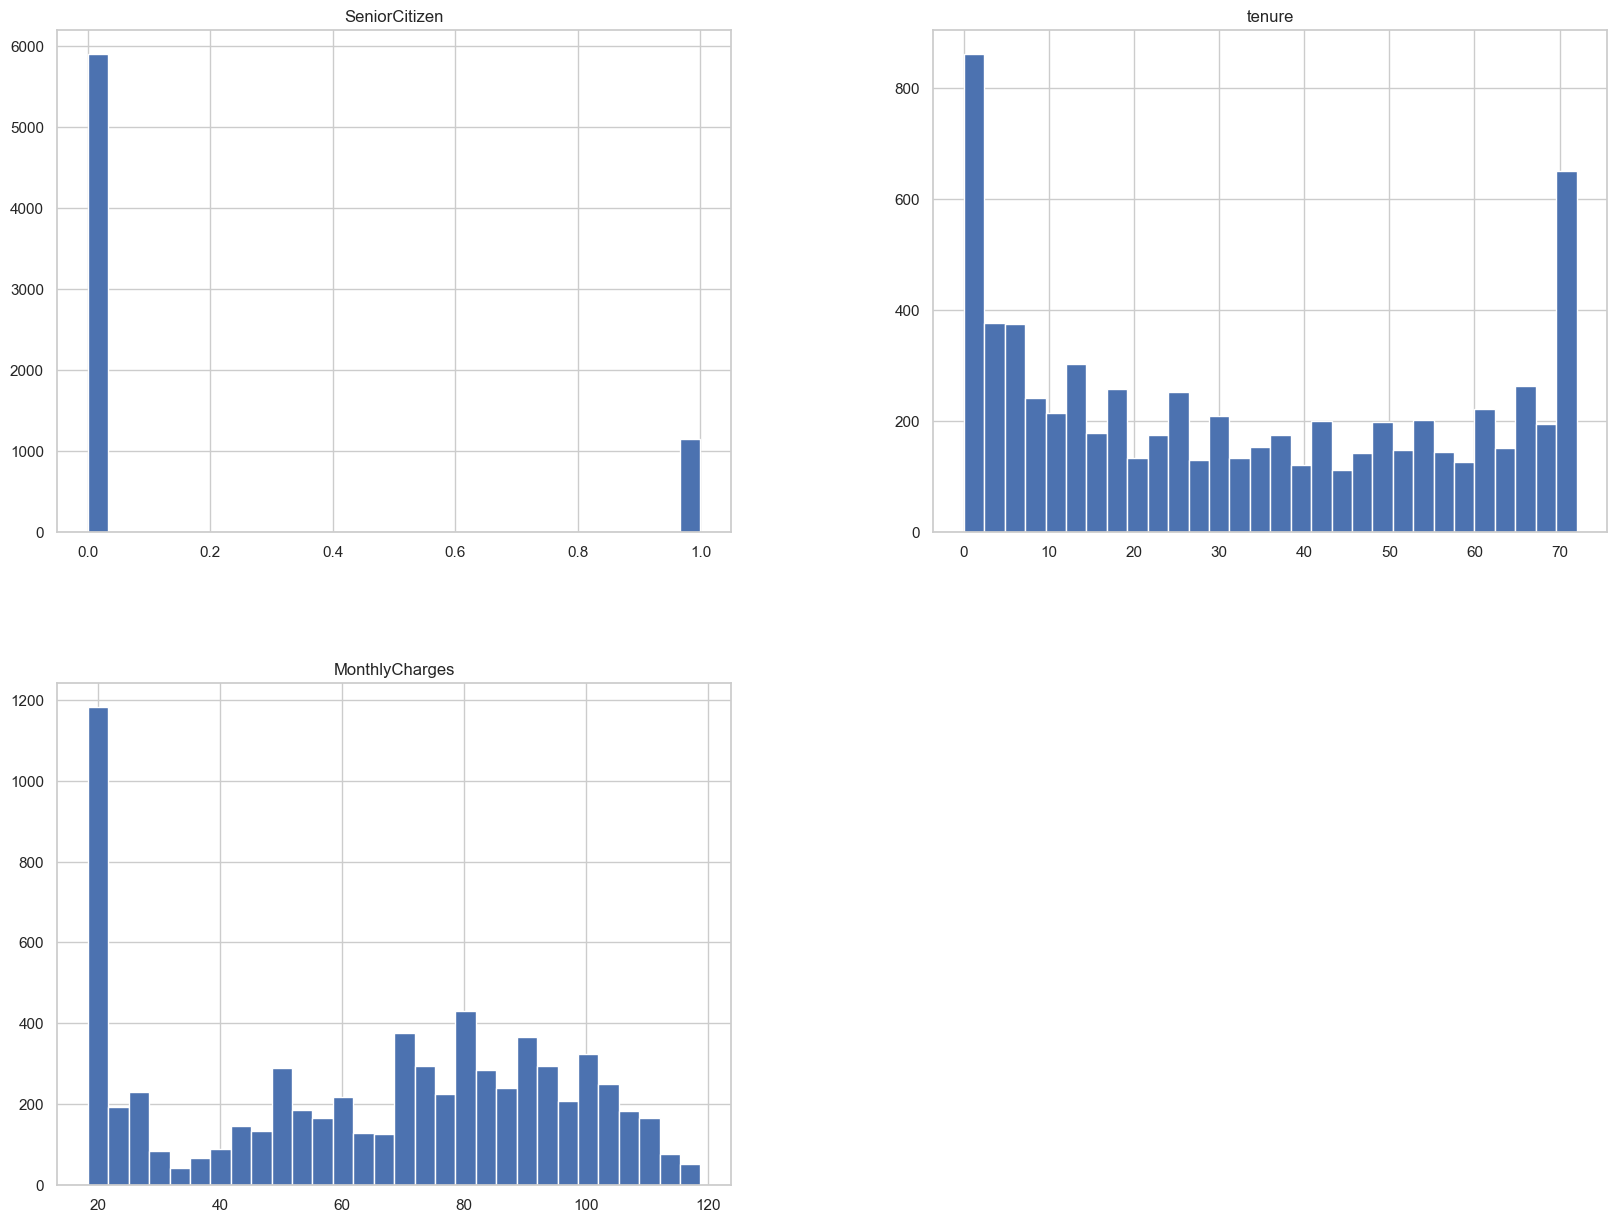

In [33]:
# Create histograms for all columns in the DataFrame
df.hist(bins=30, figsize=(20, 15))

# Define the path to save the histograms image
save_path = os.path.join(root_dir, 'Data_Preparation', 'eda_visualizations', 'numerical_distributions.png')

# Save the histograms to the specified path
plt.savefig(save_path)

# Display the histograms
plt.show()


## Box Plots for Data Distribution
In this section, we will create box plots for the DataFrame. These visualizations help in understanding the distribution and identifying outliers in the dataset.

**Steps**:
1. Set Figure Size: Set the size of the figure using plt.figure(figsize=(20, 15)).
2. Create Box Plot: Use sns.boxplot to create a box plot for the DataFrame.
3. Rotate X-axis Labels: Rotate the x-axis labels for better readability using plt.xticks(rotation=90).
4. Save Box Plot: Define the path to save the box plot image and save it using plt.savefig.
5. Display Box Plot: Display the box plot using plt.show.

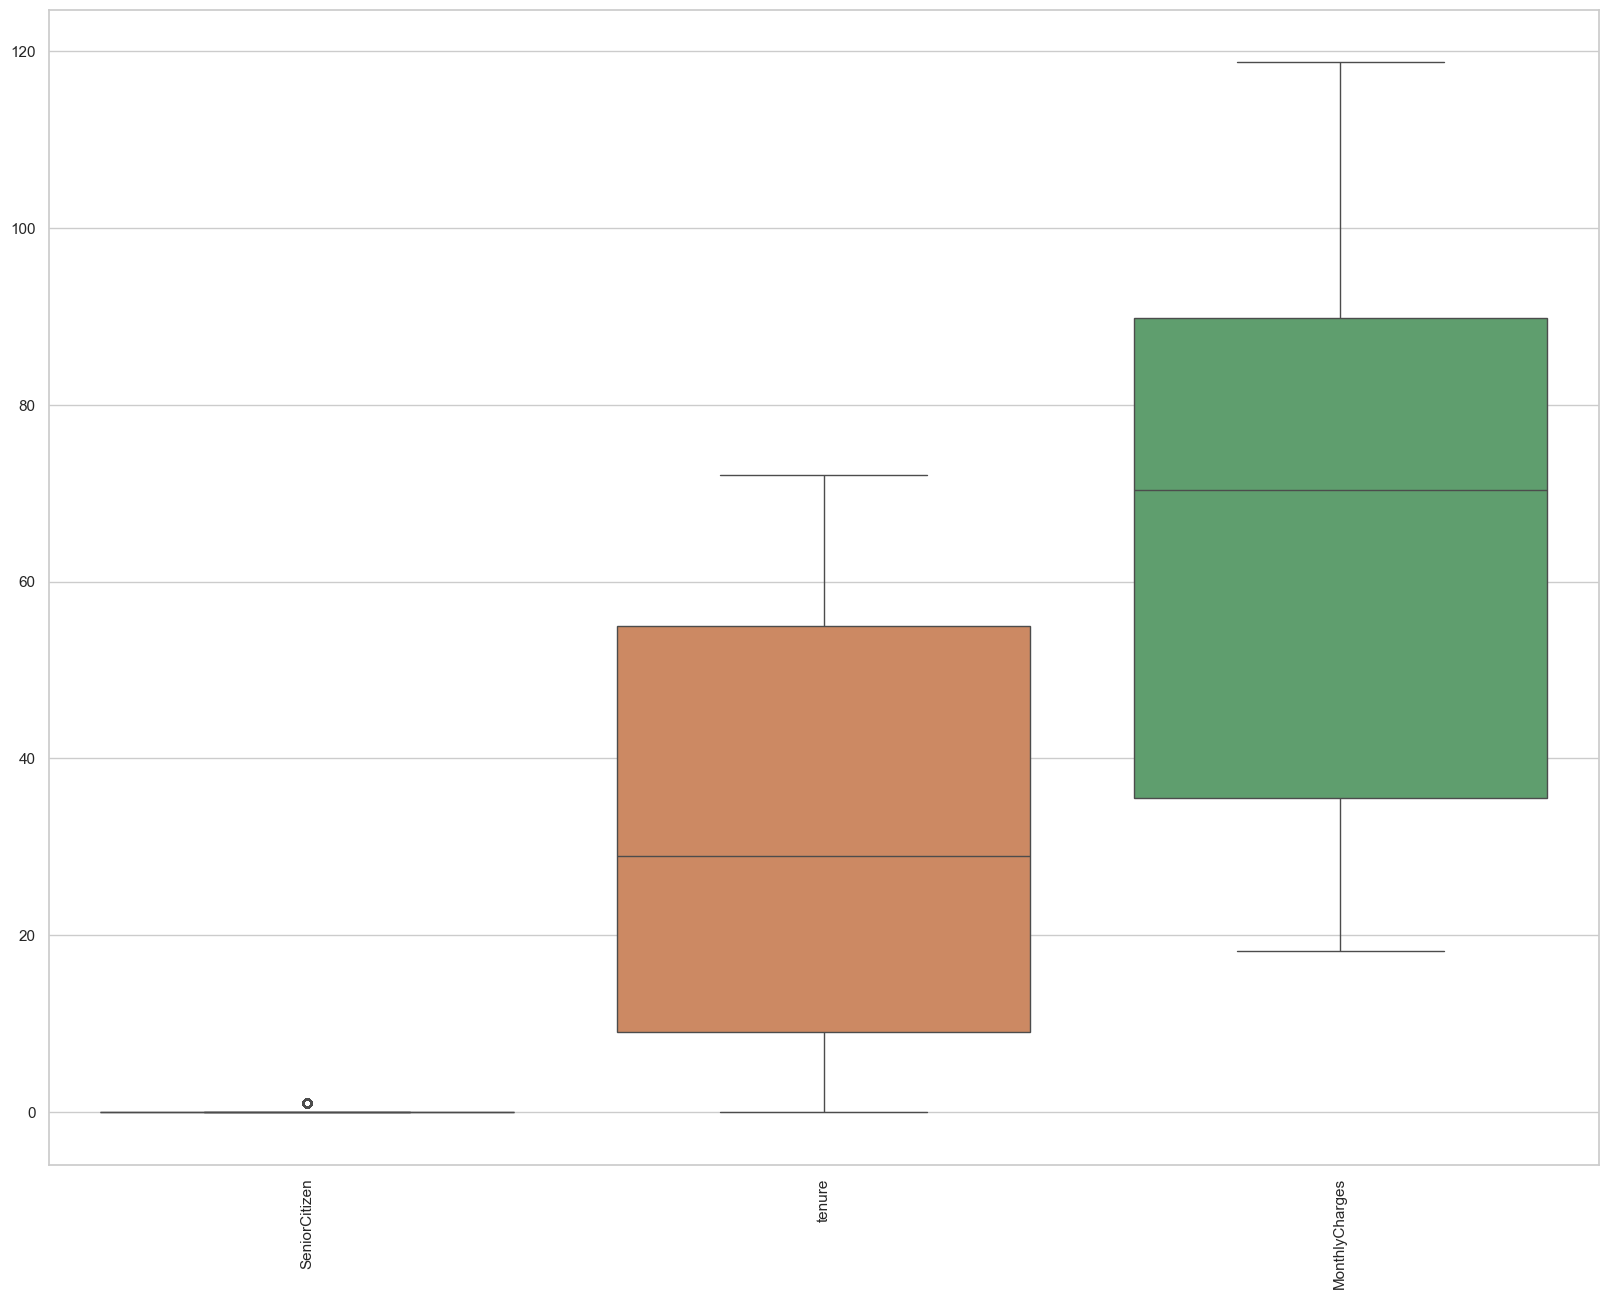

In [34]:
# Set the size of the figure
plt.figure(figsize=(20, 15))

# Create a box plot for the DataFrame
sns.boxplot(data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Define the path to save the box plot image
save_path = os.path.join(root_dir, 'Data_Preparation', 'eda_visualizations', 'box_plots.png')

# Save the box plot to the specified path
plt.savefig(save_path)

# Display the box plot
plt.show()


## Categorical Feature Analysis
In this section, we will create count plots for each categorical column in the dataset. These visualizations help in understanding the distribution of categorical features.

**Steps**:

1. Loop Through Categorical Columns: Loop through each categorical column in the DataFrame using df.select_dtypes(include=['object']).columns.
2. Set Figure Size: Set the size of the figure using plt.figure(figsize=(10, 5)).
3. Create Count Plot: Use sns.countplot to create a count plot for the current categorical column.
4. Rotate X-axis Labels: Rotate the x-axis labels for better readability using plt.xticks(rotation=90).
5. Save Count Plot: Define the path to save the count plot image and save it using plt.savefig.
6. Display Count Plot: Display the count plot using plt.show.

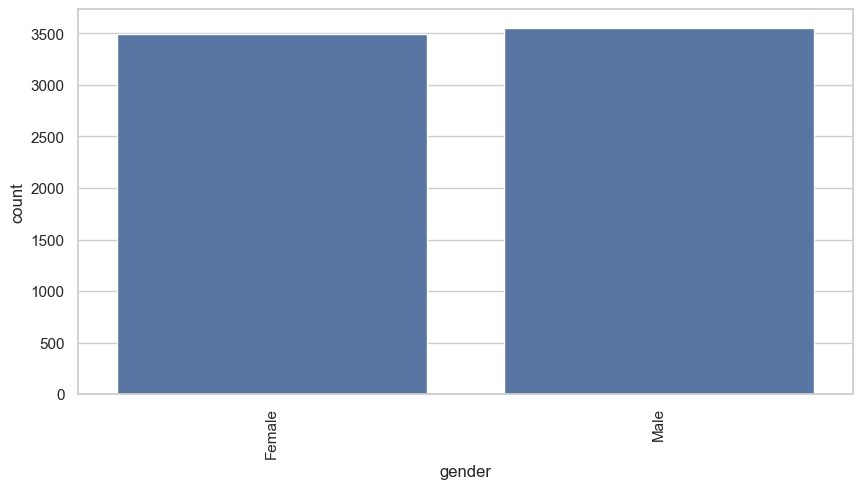

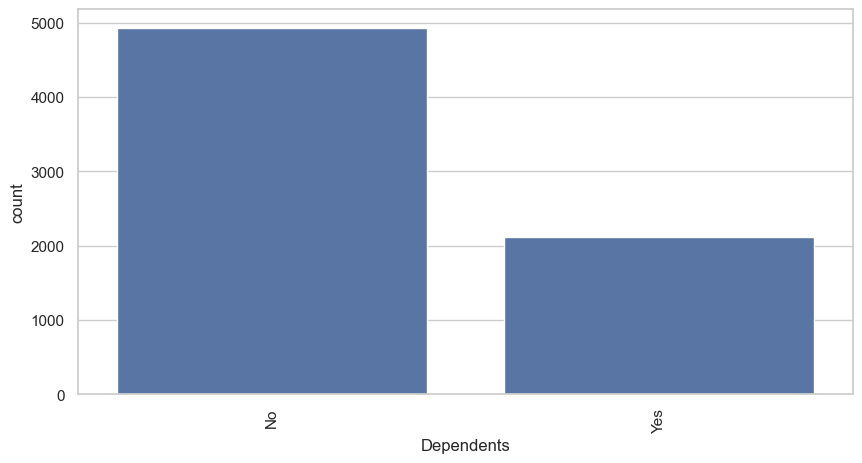

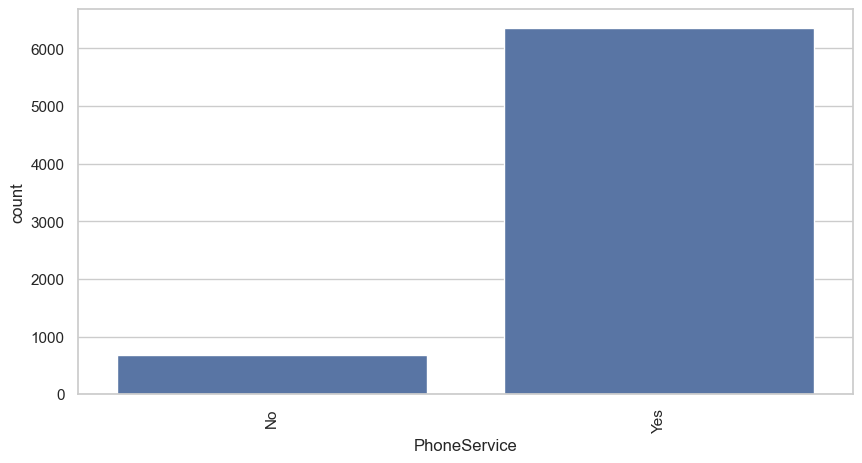

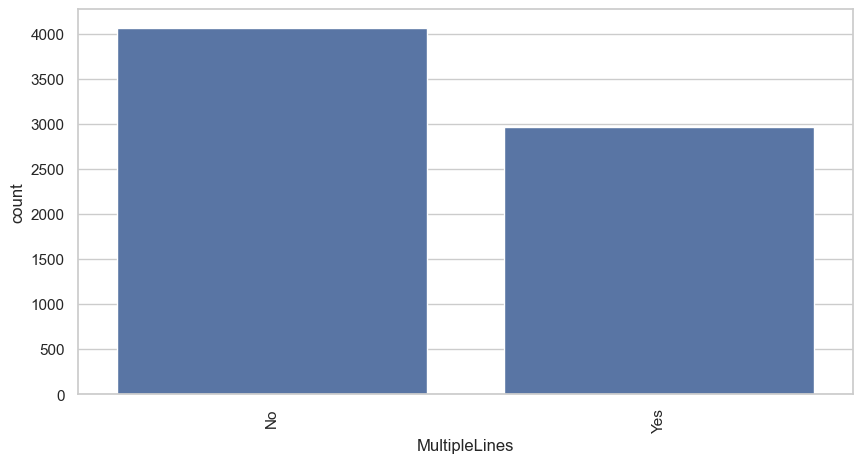

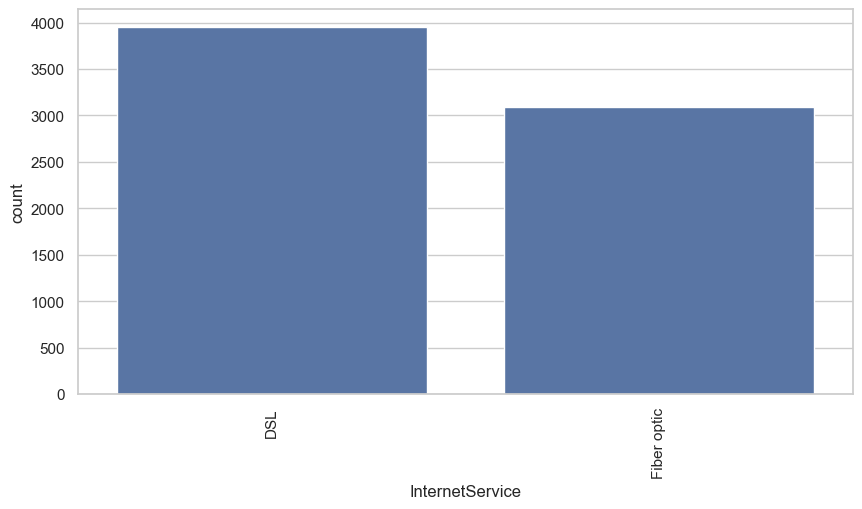

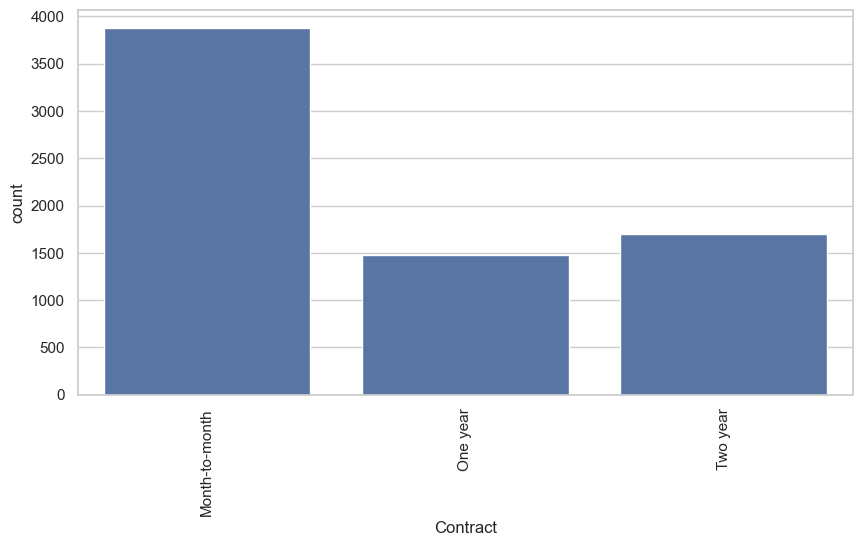

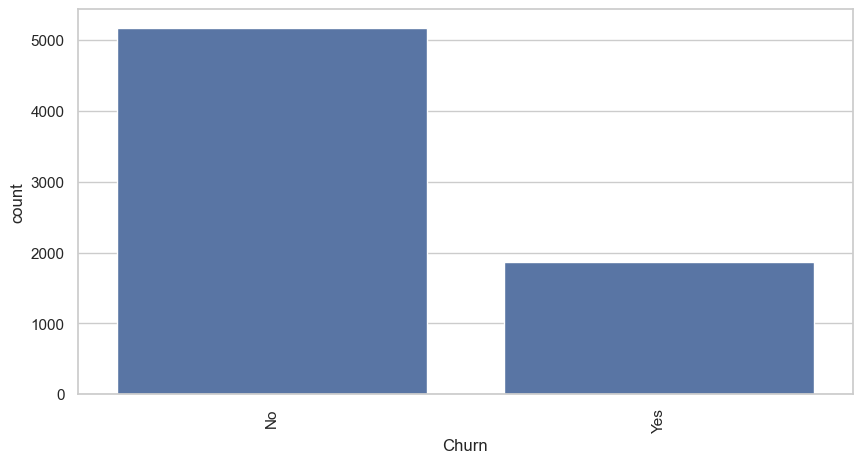

In [35]:
# Loop through each categorical column in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    # Set the size of the figure
    plt.figure(figsize=(10, 5))
    
    # Create a count plot for the current categorical column
    sns.countplot(data=df, x=column)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Define the path to save the count plot image
    save_path = os.path.join(root_dir, 'Data_Preparation', 'eda_visualizations', f'{column}_distribution.png')
    
    # Save the count plot to the specified path
    plt.savefig(save_path)
    
    # Display the count plot
    plt.show()


## Correlation Matrix Heatmap
In this section, we will create a heatmap of the correlation matrix for numeric columns. This visualization helps in understanding the relationships between different numeric features.

**Steps**:

1. Select Numeric Columns: Select numeric columns from the DataFrame using df.select_dtypes(include=['float64', 'int64']).columns.
2. Calculate Correlation Matrix: Calculate the correlation matrix for the numeric columns using df[numeric_cols].corr().
3. Create Heatmap: Use sns.heatmap to create a heatmap of the correlation matrix.
4. Save Heatmap: Define the path to save the heatmap image and save it using plt.savefig.
5. Display Heatmap: Display the heatmap using plt.show.

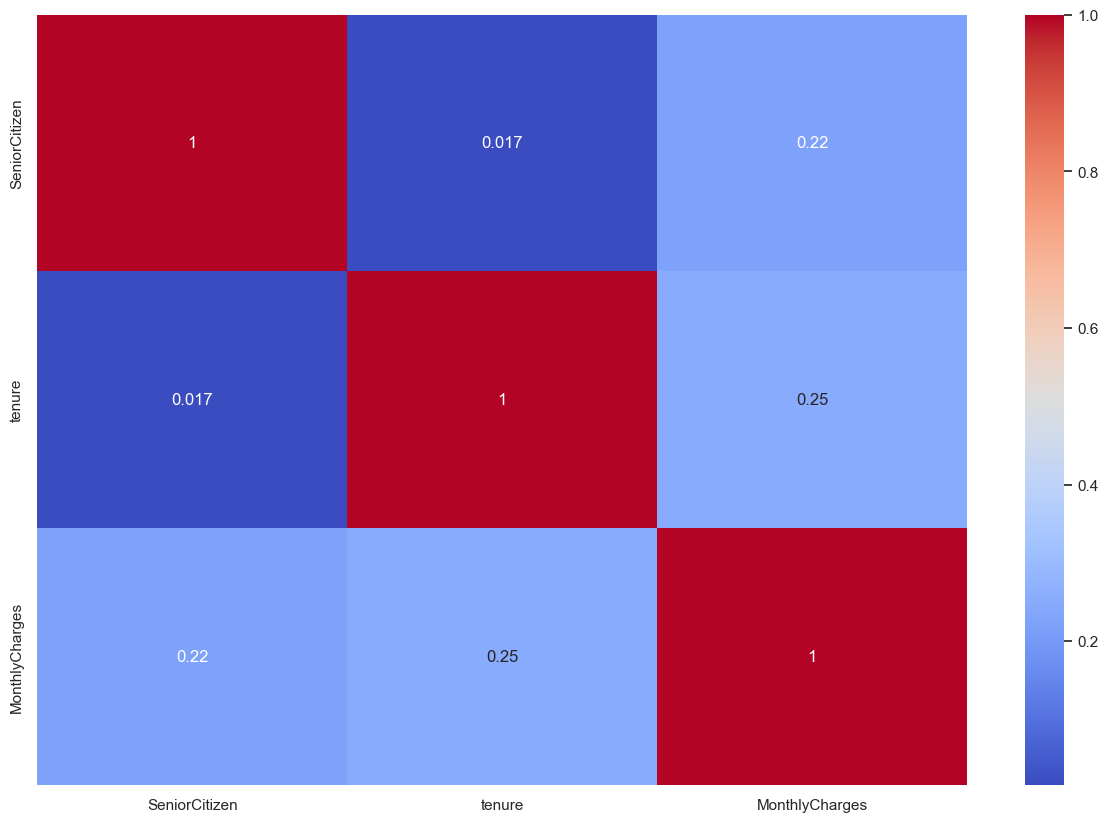

In [36]:
# Select numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the numeric columns
corr_matrix = df[numeric_cols].corr()

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Define the path to save the correlation matrix image
save_path = os.path.join(root_dir, 'Data_Preparation', 'eda_visualizations', 'correlation_matrix.png')

# Save the correlation matrix heatmap to the specified path
plt.savefig(save_path)

# Display the heatmap
plt.show()


## Missing Values Analysis
In this section, we will analyze the missing data in the dataset. Understanding the amount and percentage of missing data in each column is crucial for data cleaning and preprocessing.

**Steps**:
1. Calculate Total Missing Values: Calculate the total number of missing values for each column using df.isnull().sum().
2. Calculate Percentage of Missing Values: Calculate the percentage of missing values for each column by dividing the total missing values by the number of rows and multiplying by 100.
3. Create DataFrame for Missing Data Information: Create a DataFrame to hold the total missing values and their percentages.
4. Display Missing Data Information: Display the DataFrame with missing data information to understand the extent of missing data in each column.

In [37]:
# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to hold the total missing values and their percentages
missing_data = pd.DataFrame({'Total Missing': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame with missing data information
missing_data
# Returns: A DataFrame showing the total number of missing values and their percentages for each column


,Total Missing,Percentage
gender,0,0.0
SeniorCitizen,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
Contract,0,0.0
MonthlyCharges,0,0.0
Churn,0,0.0


## Pair Plots with Churn
In this section, we will create a pair plot of numeric columns, colored by the Churn column. This visualization helps in understanding the relationships between different numeric features and how they differ for customers who churn versus those who do not.

**Steps**:
1. Import Libraries: Import the necessary libraries seaborn and matplotlib.pyplot.
2. Create Pair Plot: Use seaborn.pairplot to create a pair plot of the numeric columns, colored by the Churn column.
3. Save Pair Plot: Define the path to save the pair plot image and save it using plt.savefig.
4. Display Pair Plot: Display the pair plot using plt.show.

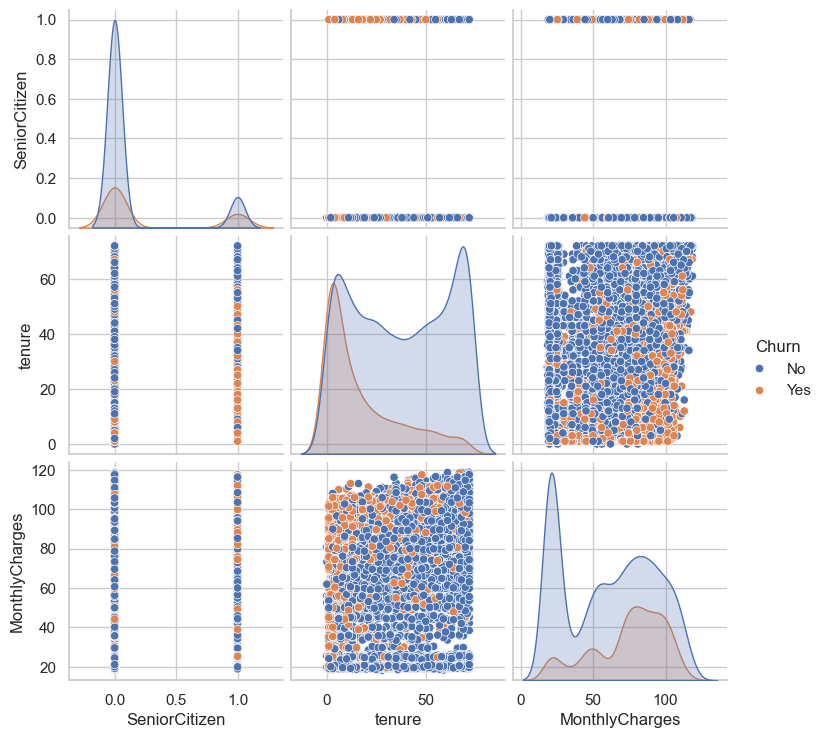

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create a pair plot of numeric columns colored by the 'Churn' column
sns.pairplot(df, hue='Churn', vars=numeric_cols)

# Define the path to save the pair plot image
save_path = os.path.join(root_dir, 'Data_Preparation', 'eda_visualizations', 'pair_plots.png')

# Save the pair plot to the specified path
plt.savefig(save_path)

# Display the pair plot
plt.show()

# Returns: Displays the pair plot and saves it to the specified path


## Group Analysis by Churn
In this section, we will calculate the mean of numeric columns grouped by the Churn column. This will help us understand the average values of different features for customers who churned versus those who did not.

**Steps**:
1. Group by 'Churn': We group the dataset by the Churn column.
2. Calculate Mean: We calculate the mean of numeric columns for each Churn group.
3. Display the Results: We display the resulting DataFrame showing the mean values.

In [39]:
# Calculate the mean of numeric columns grouped by the 'Churn' column
churn_summary = df.groupby('Churn')[numeric_cols].mean()

# Display the resulting DataFrame
churn_summary
# Returns: A DataFrame showing the mean of numeric columns for each Churn group


,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332
